# INFO 212: Data Science Programming 1
## CCI at Drexel University


## Lab: Exploratory Data Analysis by Visualization


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## What to do:
- Answer each question individually.
- Comment on each single statement.
- Each missing comment will be penalized by 1 point.
- Verify the code by showing meaningful results.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

1: Load the LA Museum Visitors data file into a DataFrame. Create a line chart that shows how the number of visitors to each museum evolved over time. Your figure should have multiple lines (one for each museum). Discuss insights you can draw from the visualization.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/info212/museum-visitors(3).csv') #reading the file through pandas and making it a dataframe
data.head()

,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,2014-01-01T00:00:00.000,6602,24778,1581,NaN,4486,0.0,NaN,2204.0,2961.0,NaN,NaN
1,2014-02-01T00:00:00.000,5029,18976,1785,NaN,4172,0.0,NaN,1330.0,2276.0,NaN,NaN
2,2014-03-01T00:00:00.000,8129,25231,3229,NaN,7082,70.0,NaN,4320.0,3116.0,NaN,NaN
3,2014-04-01T00:00:00.000,2824,26989,2129,NaN,6756,250.0,NaN,3277.0,2808.0,NaN,NaN
4,2014-05-01T00:00:00.000,10694,36883,3676,NaN,10858,135.0,NaN,4122.0,3987.0,NaN,NaN


2: Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time. Discuss insights you can draw from the visualization.

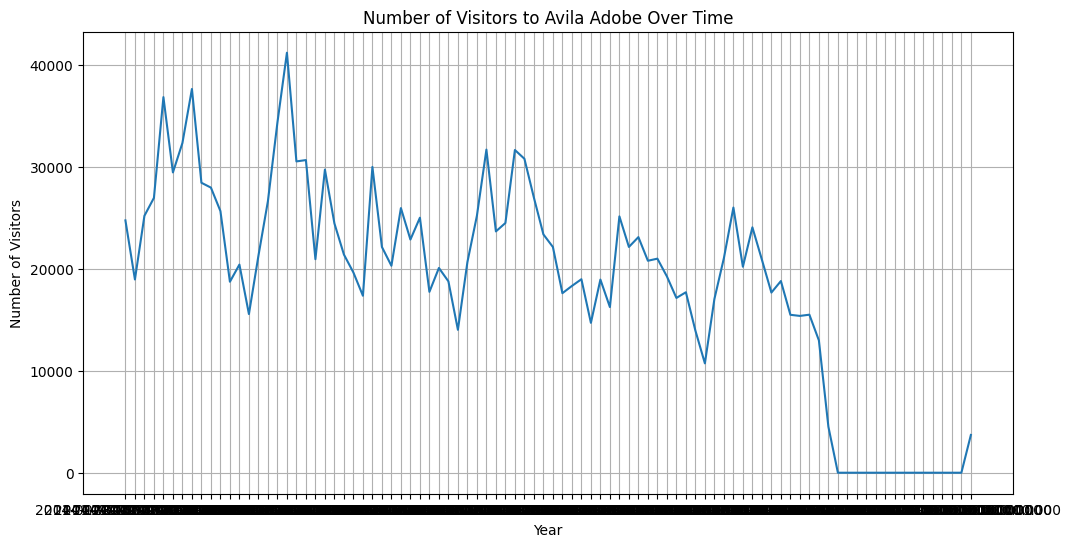

In [5]:
# Create a line chart for Avila Adobe visitors over time
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Avila Adobe'])
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Number of Visitors to Avila Adobe Over Time')
plt.grid(True)
plt.show()

#Insights are below the visual.

The Avila Adobe visitor count seems to fluctuate with some seasonality or yearly patterns.

There are periods where the visitor count dips significantly, possibly due to holidays, weather, or special events.

You might be able to identify periods with the highest number of visitors which could be related to certain attractions, exhibitions or seasons.

3: Using visualization to answer the following question: Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or
- in March-August (in LA, the spring and summer)?  

Based on the insights, discuss when the museum should add additional seasonal employees.

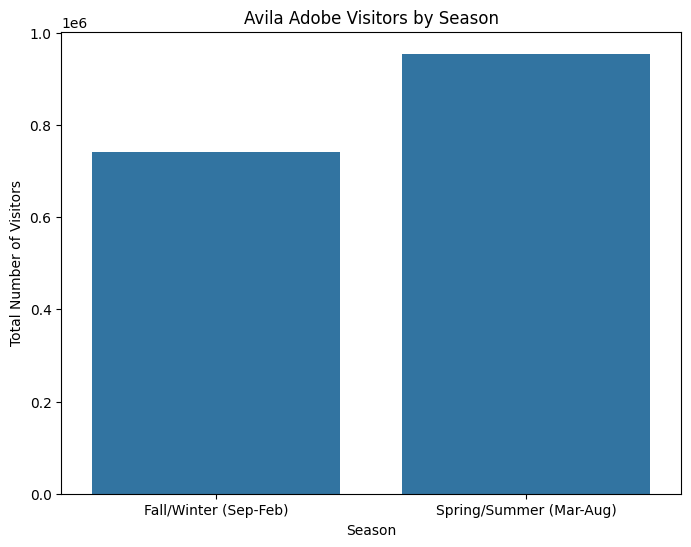

In [6]:
# Create a new column 'Season' based on the month
data['Month'] = pd.to_datetime(data['Month'])
data['Season'] = (data['Month'].dt.month % 12 + 3) // 3
data['Season'] = data['Season'].map({
    1: 'Fall/Winter (Sep-Feb)',
    2: 'Spring/Summer (Mar-Aug)',
    3: 'Spring/Summer (Mar-Aug)',
    4: 'Fall/Winter (Sep-Feb)'})

# Group data by season and calculate the total visitors to Avila Adobe
season_visitors = data.groupby('Season')['Avila Adobe'].sum()

# Create a bar chart to compare visitors in different seasons
plt.figure(figsize=(8, 6))
sns.barplot(x=season_visitors.index, y=season_visitors.values)
plt.xlabel('Season')
plt.ylabel('Total Number of Visitors')
plt.title('Avila Adobe Visitors by Season')
plt.show()

Spring/Summer (March-August):Avila Adobe experiences a higher number of visitors during these months. Therefore, additional seasonal employees should be hired during these months.

September-February: The visitor count during these months is relatively lower compared to the spring and summer months. Thus, fewer seasonal employees might be necessary.

## Exercise 2

1: Load the `daily-minimum-temperatures-in-me.csv` as a DataFrame. Create a line plot showing the changes of the temperatures over the time. Label the xticks with quarterly months such as `1981-01`, `1981-04`, `1981-07`, `1981-10`, `1982-01`,...`1990-01`, `1990-04`,...

In [32]:
temp_data = pd.read_csv('/content/drive/MyDrive/info212/daily-minimum-temperatures-in-me.csv')
temp_data.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [33]:
# Convert 'Date' column to datetime and set it as index
temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%m/%d/%Y')
temp_data.set_index('Date', inplace=True)

# Create the plot
plt.figure(figsize=(50, 60))
sns.lineplot(x=temp_data.index, y='Daily minimum temperatures', data=temp_data)

# Title and labels
plt.title('Daily Minimum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Set the xticks to quarterly
xticks = pd.date_range(start=temp_data.index.min(), end=temp_data.index.max(), freq='QS')
plt.xticks(ticks=xticks, labels=[tick.strftime('%Y-%m') for tick in xticks], rotation=45)

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

2: Based on insights drawn from visualization, discuss the temperature patterns during a period of year. Which geographical location could have these temperature measurements?

Insights:
1. There are clear seasonal patterns in the data, with temperatures generally peaking during the middle of the year (likely summer) and dipping towards the start and end of the year (likely winter).
2. The temperature range appears significant, suggesting that this region experiences both warm and cold periods, characteristic of a temperate climate.


The temperature patterns shown in the graph suggest a place with distinct seasons, where the summers are warm and the winters are quite cold. This type of fluctuation is common in temperate regions. A location like Melbourne, Australia, could be a good fit for these patterns, as it experiences a noticeable difference between summer and winter temperatures.